In [14]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
iris = datasets.load_iris()

In [93]:
X, y = iris["data"], (iris["target"] == 0).astype(np.int8).reshape((150,1))

# train-test
print(iris["feature_names"])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [94]:
#print(iris.keys())
#print(iris["feature_names"])

X_clean = np.ndarray(X.shape)

for i in range(0,X.shape[1]):
    #print(iris["feature_names"][i])
    
    
    X_clean[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
    #print(stats.describe(X_clean[:,i]))
    #plt.hist(X_clean[:,i], bins = 10)
    #plt.show()

train_test_index = int(np.floor(len(X)*0.8))
indices = np.arange(0,X.shape[0],1)
np.random.shuffle(indices)

train_indices = indices[:train_test_index]
test_indices = indices[train_test_index:]

X_train, X_test, y_train, y_test = X_clean[train_indices], X_clean[test_indices], y[train_indices], y[test_indices]

[[ 1.19761599]
 [ 2.25740888]
 [-0.18899376]
 [-1.631596  ]]
params  [[-0.37962526]
 [ 4.08027486]
 [-3.06243377]
 [-4.47983808]]
UniqueCountsResult(values=array([False,  True]), counts=array([19, 11]))
UniqueCountsResult(values=array([0, 1], dtype=int8), counts=array([19, 11]))


In [121]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_gradient(x, y, params):
    m = len(x)
    return 1/m * x.T.dot(sigmoid(x.dot(params)) - y)

def batch_gradient_descent(x : np.ndarray, y: np.ndarray, learning_rate, n_iterations):
    params = np.random.randn(x.shape[1], 1)

    for i in range(n_iterations):
        gradient = get_gradient(x, y, params)
        #print("gradient ", gradient)
        params = params - learning_rate * gradient

    return params
    
def log_loss(preds, y):
    return -(1/len(preds))*(y.T.dot(np.log(preds)) + (1 - y).T.dot(np.log(1 - preds)))

learning_rates_to_try = [0.01,0.1,0.5]
n_interations_to_try = [100,500,1000,2000]



for learning_rate in learning_rates_to_try:
    for n_iterations in n_interations_to_try:
        params = batch_gradient_descent(X_train, y_train, learning_rate=learning_rate, n_iterations=n_iterations)
        y_test_predictions = (sigmoid(X_test.dot(params))).reshape((y_test.shape[0],1))
        print([learning_rate, n_iterations, log_loss(y_test_predictions, y_test)[0,0]])

        

[0.01, 100, np.float64(0.5975201396535008)]
[0.01, 500, np.float64(0.6585276362708288)]
[0.01, 1000, np.float64(0.312222382858492)]
[0.01, 2000, np.float64(0.4006047011356691)]
[0.1, 100, np.float64(0.3912671568166439)]
[0.1, 500, np.float64(0.18826693809939796)]
[0.1, 1000, np.float64(0.0956492204565596)]
[0.1, 2000, np.float64(0.051816655190747504)]
[0.5, 100, np.float64(0.1724208120846136)]
[0.5, 500, np.float64(0.043072457972905744)]
[0.5, 1000, np.float64(0.021943759590631554)]
[0.5, 2000, np.float64(0.011762818409703208)]


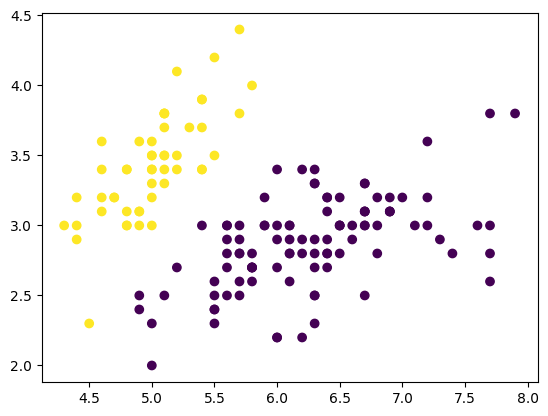

In [96]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()